Project 1: Classification of Iris Flowers
Input: Iris.csv data set
Project: Building different classification models, validation and performance
evaluation of models

Step 1: Import all necessary libraries
    The following libraries to be imported in this project:
    pandas: Used to read and manipulate CSV data.
    Numpy: For fast and efficient processing of data
    sklearn.dataset: To load data from the Sci-Kit-Learn repository
    sklearn.train_test_split: From scikit-learn, used to split data into training and testing sets.
    sklearn.preprocessing: For feature scaling/normalization
    sklearn.LogisticRegression: A common classification algorithm from scikit-learn.
    sklearn.SVC: Support Vector Machine Classifier
    sklearn.RandomeForest: Random Forest Classification
    sklearn.KNeighborsClassifier: k-Nearest Neighbour classifier
    sklearn.DecissionTreeClassifier: Decision Tree Classifier
    sklearn.MLPClassifier: Multi-Layer Perceptron classifier
    sklearn.GradientBoostingClassifier: Gradient Boosting classifier
    sklearn.accuracy_score: To calculate model accuracy.

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
# Step 1: Load the Iris dataset (it is a classic builtin dataset)
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
# Download the data from "Iris.csv"   locally             
X, y = iris.data, iris.target        
# Convert to DataFrame for better processing
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y
# Preview the dataset: It is required as a customary step!
#print("Top 5 rows of the dataset:")
#print(df.head())
#print("Bottom 5 rows of the dataset:")
#print(df.tail())
#print("The columns present in the data frame
#print(df.columns)
#print("The information about the attributes
print(df.info())
#print("To check if the null entries are there")
#print(df.isnull())
#print("The statistical information about the data")
# print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


Step 2: Split the data set into two parts: "Training set" and "Test set"
The following library is used
    import train_test_split from sklearn.model_selection
    "Training set" is used to train a model and "Test set" is used to test a model

In [24]:
from sklearn.model_selection import train_test_split
print("Import of \"Train-Test-Split-Selection\" library is successful")

# Split the dataset into training and testing sets: 67% for training and 33% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, train_size=0.67, random_state=42)

# Note 1: Data (i.e., Data-attributes and Target-column) are kept as separate variables (X for features, y for target labels)
# Note 2: Here, random_state=42 is chosen as a seed value and popularly used for reproducibility in experiments

print("\nTrain and test data shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)


Import of "Train-Test-Split-Selection" library is successful

Train and test data shapes:
X_train: (100, 4) X_test: (50, 4)


Step 3: Preprocessing
    (a)Handling null-entries, if applicable
    (b) Scaling (to put all values in a normalize scale)
        
        For scaling there are many methods: StandardScalar, MinMaxScalar, Normalizer, PolynomialFeatures, etc. Use any one.

In [ ]:
from sklearn.preprocessing import StandardScaler

### Tutorial to learn the basics of scalar-based normalization

# Create a DataFrame for training data
data1 = {'A': [2, 4, 5, 6, 7, 8, 9], 'B': [60, 70, 90, 10, 30, 40, 50]}
# Create a DataFrame for testing data
data2 = {'A': [1, 6, 3], 'B': [80, 40, 20]}

# Convert dictionaries to pandas DataFrame
X_train_ = pd.DataFrame(data1)
X_test_ = pd.DataFrame(data2)

# Create a StandardScaler object for normalization
scaler = StandardScaler()

# Fit and transform the training data (learn scaling parameters from training data)
X_train_scaled_ = scaler.fit_transform(X_train_)
print("Normalized training dataset...\n")
print(X_train_scaled_)  # Using print instead of display() for general compatibility

# Transform the testing data using the parameters already learned from training data
X_test_scaled_ = scaler.transform(X_test_)  # Corrected from fit_transform() to transform() #### in Tutorial fit_transform() is used, but gpt suggests transform()
print("\nNormalized testing dataset...\n")
print(X_test_scaled_)  # Using print instead of display()

Normalized training dataset...

[[-1.72849788  0.40824829]
 [-0.83223972  0.81649658]
 [-0.38411064  1.63299316]
 [ 0.06401844 -1.63299316]
 [ 0.51214752 -0.81649658]
 [ 0.9602766  -0.40824829]
 [ 1.40840568  0.        ]]

Normalized testing dataset...

[[-1.13554995  1.33630621]
 [ 1.29777137 -0.26726124]
 [-0.16222142 -1.06904497]]


In [25]:
# Handling missing values: There are no missing values

# Normalization of training and testing data

'''
Note: For normalization, sklearn provides two methods: fit_transform() and transform().
    - fit_transform() is applied to training data, whereas transform() is applied to testing data.
    - fit_transform() is a combination of:
    - fit(): To calculate the necessary transformation parameters based on the training data (e.g., min, max, mean, standard deviation).
    - transform(): To apply the transformation to the data using the parameters learned from the training data.
    - The two methods are applicable to all normalization methods defined in sklearn.
'''

# Import scaling methods for normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PolynomialFeatures

# Standard Scaling (Standardization)
scaler = StandardScaler()  # Create a StandardScaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Apply transform() to test data using learned parameters
print("Standard Scaled Data (First 5 rows):\n", X_train_scaled[:5])  # Show first 5 rows

# Min-Max Scaling (Normalization to range [0,1])
minmax_scaler = MinMaxScaler()  # Create a MinMaxScaler object
X_train_minmax = minmax_scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_minmax = minmax_scaler.transform(X_test)  # Apply transform() to test data using learned parameters
print("\nMin-Max Scaled Data (First 5 rows):\n", X_train_minmax[:5])  # Show first 5 rows

# L2 Normalization (Scaling each row to unit norm)
normalizer = Normalizer()  # Create a Normalizer object
X_train_normalized = normalizer.fit_transform(X_train)  # Fit and transform the training data
X_test_normalized = normalizer.transform(X_test)  # Apply transform() to test data using learned parameters
print("\nNormalized Data (First 5 rows):\n", X_train_normalized[:5])  # Show first 5 rows

# Polynomial Feature Transformation (Expanding features up to the given degree)
poly = PolynomialFeatures(degree=2, include_bias=False)  # Create a PolynomialFeatures object (degree=2)
X_train_poly = poly.fit_transform(X_train)  # Fit and transform the training data
X_test_poly = poly.transform(X_test)  # Apply transform() to test data using learned parameters
print("\nPolynomial Features (First 5 rows):\n", X_train_poly[:5])  # Show first 5 rows


Standard Scaled Data (First 5 rows):
 [[-0.13835603 -0.26550845  0.22229072  0.10894943]
 [ 2.14752625 -0.02631165  1.61160773  1.18499319]
 [-0.25866563 -0.02631165  0.39595535  0.37796037]
 [-0.8602136   1.16967238 -1.39857913 -1.37061074]
 [ 2.26783585 -0.50470526  1.66949594  1.05048772]]

Min-Max Scaled Data (First 5 rows):
 [[0.41176471 0.40909091 0.55357143 0.5       ]
 [0.97058824 0.45454545 0.98214286 0.83333333]
 [0.38235294 0.45454545 0.60714286 0.58333333]
 [0.23529412 0.68181818 0.05357143 0.04166667]
 [1.         0.36363636 1.         0.79166667]]

Normalized Data (First 5 rows):
 [[0.73446047 0.37367287 0.5411814  0.16750853]
 [0.70953708 0.28008043 0.61617694 0.1960563 ]
 [0.70631892 0.37838513 0.5675777  0.18919257]
 [0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.71486543 0.25995106 0.62202576 0.18567933]]

Polynomial Features (First 5 rows):
 [[5.700e+00 2.900e+00 4.200e+00 1.300e+00 3.249e+01 1.653e+01 2.394e+01
  7.410e+00 8.410e+00 1.218e+01 3.770e+00 1.764e+01 

Step 4: Dimensionality reduction
There are several methods defined in sklearn:

PCA (Principal Component Analysis), IDA (Independent Component Analysis),
LDA (Linear Discrimnant Analysis), NMF (Non-negative Matrix Factorization), SVD (Singular Value Decomposition), etc. are a few popular dimensionality reduction techniques

This project follows PCA
Note: Dimnsionality reduction method is optional and does not necessarily yield
good results

In [26]:
# Using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Display PCA results
print("\nPCA Reduced Training data shape (2 components):", X_train_pca.shape)
print("\nPCA Reduced Testing data shape (2 components):", X_test_pca.shape)



PCA Reduced Training data shape (2 components): (100, 2)

PCA Reduced Testing data shape (2 components): (50, 2)


Step 5: Building Classification Models
There are several ML algorithms that can be followed to build classification models. In this project, we shall follow the
following ML algorithms followed by the performance evaluation of each.
    Support Vector Machine (SVM) classifier
    Random Forest classifier
    Decision Tree classifier
    Logistic Regression classifier
    XGBoost classifier
    Gradient boosting classifier

In [27]:
# Import SVM from sklearn package
from sklearn.svm import SVC  # Import Support Vector Machine (SVM) classifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the classification model
svm_model = SVC()  

# Train the model using the training dataset
svm_model.fit(X_train_scaled, y_train)      

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test_scaled)  

# Display predictions
print("\nSVM Predictions (First 10):", svm_predictions[:10])

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

print("\nSVM Accuracy:", svm_accuracy)
print("\nClassification Report:\n", svm_report)



SVM Predictions (First 10): [1 0 2 1 1 0 1 2 1 1]

SVM Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



Evaluation of the performance of SVM classifier
    Evaluation with the simple validation method

Import of packages for performance evaluation is successful



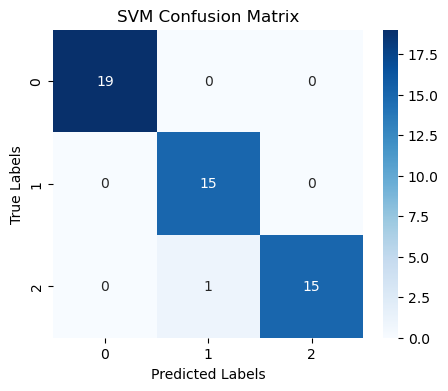


Accuracy: 0.98

Precision: 0.98125

Recall: 0.98

F1 Score: 0.98

Specificity: 0.9904761904761905

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50


Classification with SVM is complete!


In [28]:
# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import seaborn as sns                      # Data visualization
import matplotlib.pyplot as plt            # Graph plotting
import numpy as np                         # Numerical operations

print("Import of packages for performance evaluation is successful\n")

# Define function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    conf_matrix = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, svm_predictions, "SVM Confusion Matrix")

# Accuracy: (TP+TN)/(TP+TN+FP+FN)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nAccuracy:", svm_accuracy)

# Precision: TP / (TP + FP)
svm_precision = precision_score(y_test, svm_predictions, average="weighted")
print("\nPrecision:", svm_precision)

# Recall: TP / (TP + FN)
svm_recall = recall_score(y_test, svm_predictions, average="weighted")
print("\nRecall:", svm_recall)

# F1-score: Harmonic mean of Precision and Recall
svm_f1 = f1_score(y_test, svm_predictions, average="weighted")
print("\nF1 Score:", svm_f1)

# Specificity calculation
cm = confusion_matrix(y_test, svm_predictions)
specificity = []
for i in range(len(cm)):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity.append(tn / (tn + fp))
svm_specificity = np.mean(specificity)
print("\nSpecificity:", svm_specificity)

# Classification Report
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))

print("\nClassification with SVM is complete!")


Random Forest classifier
Building model with Random Forest classifier

In [29]:
# Import Random Forest from sklearn package
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Get predictions
rf_predictions = rf_model.predict(X_test_scaled)  # Corrected model reference
y_pred = rf_predictions 
# Display first 10 predictions
print("\nRandom Forest Predictions (First 10):", rf_predictions[:10])



Random Forest Predictions (First 10): [1 0 2 1 1 0 1 2 1 1]


Evaluation of the performance of Random Forest classifier
Evaluation with the simple validation method

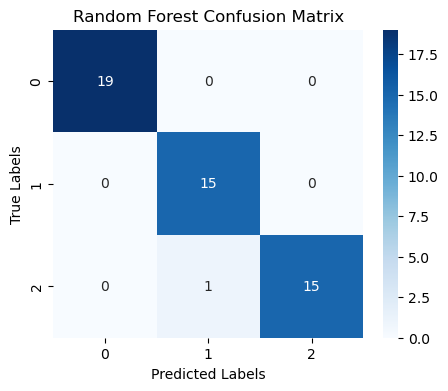


Accuracy: 0.98

Precision:  0.98125

Recall:  0.98

F1 score:  0.98

Specificity:  0.9904761904761905

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Classification with Random Forest is done!


In [30]:
# Import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, "Random Forest Confusion Matrix")

# Accuracy: (TP+TN) / (TP+TN+FP+FN)
rf_accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", rf_accuracy)

# Precision: TP / (TP+FP)
rf_precision = precision_score(y_test, y_pred, average="weighted")
print("\nPrecision: ", rf_precision)

# Recall: TP / (TP+FN)
rf_recall = recall_score(y_test, y_pred, average="weighted")
print("\nRecall: ", rf_recall)

# F1-score: Harmonic mean of Precision and Recall
rf_f1 = f1_score(y_test, y_pred, average="weighted")
print("\nF1 score: ", rf_f1)

# Specificity calculation
cm = confusion_matrix(y_test, y_pred)
specificity = []
for i in range(len(cm)):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity.append(tn / (tn + fp))

rf_specificity = np.mean(specificity)
print("\nSpecificity: ", rf_specificity)

# Report classification results
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred))

print("Classification with Random Forest is done!")


Decision Tree classifier
Building model with Decision Tree classifier

In [31]:
# Import Decision Tree from sklearn package
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model with scaled training data
dt_model.fit(X_train_scaled, y_train)

# Get predictions on test data
dt_predictions = dt_model.predict(X_test_scaled)

# Predicted results
y_pred = dt_predictions

# Print first 10 predictions
print("\nDecision Tree Predictions (First 10):", y_pred[:10])



Decision Tree Predictions (First 10): [1 0 2 1 1 0 1 2 1 1]


Evaluation of the performance of Decision Tree classifier
Evaluation with the simple validation method

NOTE:
TP (True Positive) and TN (True Negative) are terms used in classification problems to evaluate model performance.
TP (True Positive): The model correctly predicted a positive class.
Example: If the actual label is "Spam" and the model predicts "Spam", it's a TP.
TN (True Negative): The model correctly predicted a negative class.
Example: If the actual label is "Not Spam" and the model predicts "Not Spam", it's a TN.

Other related terms:
    FP (False Positive): The model incorrectly predicted a positive class (Type I Error).
    FN (False Negative): The model incorrectly predicted a negative class (Type II Error).
    These terms are used in metrics like accuracy, precision, recall, specificity, and F1-score to evaluate classification models.

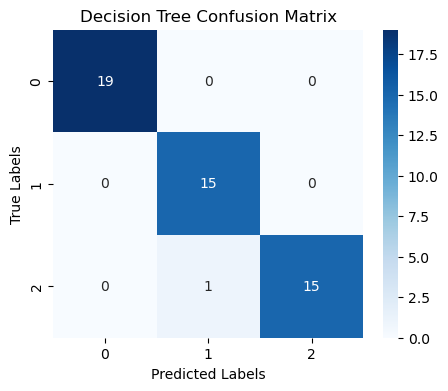


Accuracy: 0.98

Precision:  0.98125

Recall :  0.98

F1 score:  0.98

Specificity:  0.9904761904761905

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Classification with Decision Tree is done!


In [32]:
# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred, "Decision Tree Confusion Matrix")

# Accuracy: (TP+TN) / (TP+TN+FP+FN)
dt_accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", dt_accuracy)

# Precision: TP / (TP+FP)
dt_precision = precision_score(y_test, y_pred, average="weighted")
print("\nPrecision: ", dt_precision)

# Recall: TP / (TP+FN)
dt_recall = recall_score(y_test, y_pred, average="weighted")
print("\nRecall : ", dt_recall)

# F1-score: Harmonic mean of Precision and Recall
dt_f1 = f1_score(y_test, y_pred, average="weighted")
print("\nF1 score: ", dt_f1)

# Specificity calculation
cm = confusion_matrix(y_test, y_pred)
specificity = []
for i in range(len(cm)):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity.append(tn / (tn + fp))
dt_specificity = np.mean(specificity)
print("\nSpecificity: ", dt_specificity)

# Report the summary of all evaluation
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred))

print("Classification with Decision Tree is done!")


Logistic Regression classifier
Building model with Logistic Regression classifier

In [33]:
# Import Logistic Regression from sklearn package
from sklearn.linear_model import LogisticRegression  

# Logistic Regression Classifier
lr_model = LogisticRegression(random_state=42, max_iter=200)  # Initialize model

# Fit the model with scaled training data
lr_model.fit(X_train_scaled, y_train)      

# Get predictions on the test set
lr_predictions = lr_model.predict(X_test_scaled)     

# Predicted result
y_pred = lr_predictions                               

# Print first 10 predictions
print("\nLogistic Regression Predictions (First 10):", y_pred[:10])



Logistic Regression Predictions (First 10): [1 0 2 1 1 0 1 2 1 1]


Evaluation of the performance of Logistic Regression classifier
Evaluation with the simple validation method

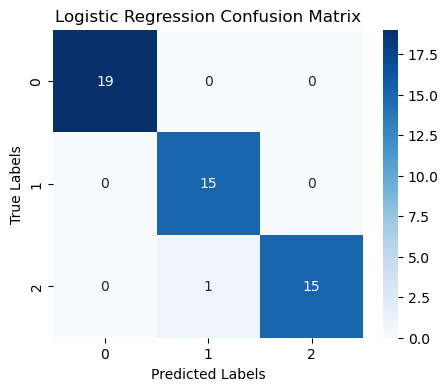


Accuracy: 0.98

Precision: 0.98125

Recall: 0.98

F1 Score: 0.98

Specificity: 0.9904761904761905

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Classification with Logistic Regression is done!


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, "Logistic Regression Confusion Matrix")

# Accuracy: (TP+TN) / (TP+TN+FP+FN)
lr_accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", lr_accuracy)

# Precision: TP / (TP + FP)
lr_precision = precision_score(y_test, y_pred, average="weighted")
print("\nPrecision:", lr_precision)

# Recall: TP / (TP + FN)
lr_recall = recall_score(y_test, y_pred, average="weighted")
print("\nRecall:", lr_recall)

# F1-score: Harmonic mean of Precision and Recall
lr_f1 = f1_score(y_test, y_pred, average="weighted")
print("\nF1 Score:", lr_f1)

# Specificity calculation
cm = confusion_matrix(y_test, y_pred)
specificity = []
for i in range(len(cm)):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity.append(tn / (tn + fp))

lr_specificity = np.mean(specificity)
print("\nSpecificity:", lr_specificity)

# Classification report
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))

print("Classification with Logistic Regression is done!")


No, machine learning models do not always give the same values for the same data. Here’s why:

1. Randomness in Model Training
    Random Initialization: Models like Random Forest and Decision Trees involve randomness (e.g., selecting features or splitting points).
    Gradient Descent in Logistic Regression: Optimization algorithms may start with different initial values.
    Stochastic Training: If models use stochastic elements (e.g., stochastic gradient descent), results can vary across runs.

2. Floating-Point Precision
    Some computations involve floating-point arithmetic, which can lead to slight variations in results.

3. Differences in Hyperparameters
    Changing random seed, learning rate, tree depth, number of estimators, etc., can lead to different results even on the same dataset.

4. Data Preprocessing Variations
    Scaling, shuffling, or missing data handling can impact the final output.

When Does It Give the Same Output?
    If you fix the random seed (random_state=42), use deterministic algorithms, and keep identical preprocessing, you’ll get the same results.

XGBoost classifier
Building model with XGBoost classifier

In [40]:
# Import XGBoost from sklearn package
from xgboost import XGBClassifier  # Import XGBoost classification model

# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')  # Initialize classifier

# Note: For details about the parameters, see the XGBoost documentation
xgb_model.fit(X_train_scaled, y_train)  # Fit the model with scaled training data

xgb_predictions = xgb_model.predict(X_test_scaled)  # Get the predictions on test data
y_pred = xgb_predictions  # Store predicted results

print("\nXGBoost Predictions (First 10):", y_pred[:10])


ModuleNotFoundError: No module named 'xgboost'

Evaluation of the performance of XGBoost classifier
Evaluation with the simple validation method

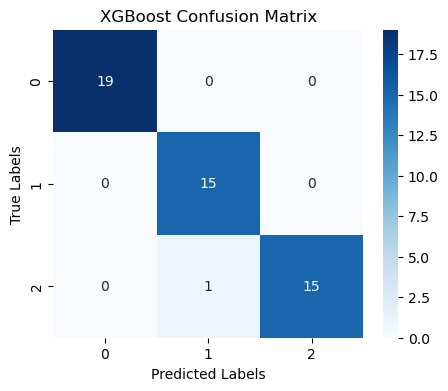


Accuracy: 0.98

Precision:  0.98125

Recall:  0.98

F1 score:  0.98

Specificity:  0.9904761904761905

XGBoost Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Classification with XGBoost is done!


In [41]:
# Plot the confusion matrix for XGBoost model
plot_confusion_matrix(y_test, y_pred, "XGBoost Confusion Matrix")

# Now, let's get the evaluation metrics for XGBoost

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
xgb_accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", xgb_accuracy)

# Precision: TP / (TP + FP) - The ratio of true positives to total predicted positives
xgb_precision = precision_score(y_test, y_pred, average="weighted")
print("\nPrecision: ", xgb_precision)

# Recall: TP / (TP + FN) - The ratio of true positives to total actual positives
xgb_recall = recall_score(y_test, y_pred, average="weighted")
print("\nRecall: ", xgb_recall)

# F1-score: Harmonic mean of Precision and Recall
xgb_f1 = f1_score(y_test, y_pred, average="weighted")
print("\nF1 score: ", xgb_f1)

# Specificity calculation (TN / (TN + FP)) for each class
cm = confusion_matrix(y_test, y_pred)  # Compute the confusion matrix
specificity = []  # List to store specificity for each class

# Loop through each class in the confusion matrix
for i in range(len(cm)):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]  # True negatives
    fp = np.sum(cm[:, i]) - cm[i, i]  # False positives
    specificity.append(tn / (tn + fp))  # Calculate specificity for class i

# Compute the average specificity
xgb_specificity = np.mean(specificity)
print("\nSpecificity: ", xgb_specificity)

# Report the classification metrics summary for XGBoost
print("\nXGBoost Classification Report:", classification_report(y_test, y_pred))

# Indicate that classification with XGBoost is complete
print("Classification with XGBoost is done!")


Gradient Boosting classifier
Building model with Gradient Boosting classifier

In [42]:
# Import Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)  # Initialize the classifier
gb_model.fit(X_train_scaled, y_train)  # Fit the model with scaled training data

# Get predictions
gb_predictions = gb_model.predict(X_test_scaled)  # Get the predictions on test data
y_pred = gb_predictions  # Predicted result

print("\nGradient Boosting Predictions (First 10):", y_pred[:10])



Gradient Boosting Predictions (First 10): [1 0 2 1 1 0 1 2 1 1]


Evaluation of the performance of Gradient Boosting classifier
Evaluation with the simple validation method

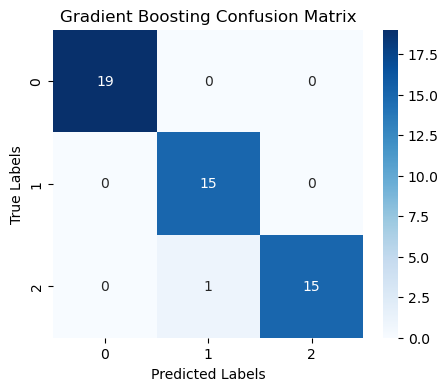


Accuracy: 0.98

Precision: 0.98125

Recall: 0.98

F1 Score: 0.98

Specificity: 0.9904761904761905

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Classification with Gradient Boosting is done!


In [43]:
plot_confusion_matrix(y_test, y_pred, "Gradient Boosting Confusion Matrix")

# Now, let's get the result of Gradient Boosting evaluation

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
gb_accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", gb_accuracy)

# Precision: TP / (TP + FP) - The ratio of true positives to total predicted positives
gb_precision = precision_score(y_test, y_pred, average="weighted")
print("\nPrecision:", gb_precision)

# Recall: TP / (TP + FN) - The ratio of true positives to total actual positives
gb_recall = recall_score(y_test, y_pred, average="weighted")
print("\nRecall:", gb_recall)

# F1-score: Harmonic mean of `Precision` and `Recall`
gb_f1 = f1_score(y_test, y_pred, average="weighted")
print("\nF1 Score:", gb_f1)

# Specificity calculation
cm = confusion_matrix(y_test, y_pred)
specificity = []
for i in range(len(cm)):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity.append(tn / (tn + fp))
gb_specificity = np.mean(specificity)

print("\nSpecificity:", gb_specificity)

# Report the summary of all evaluations
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred))

print("Classification with Gradient Boosting is done!")


Comparative study on the Performance of Different classifiers

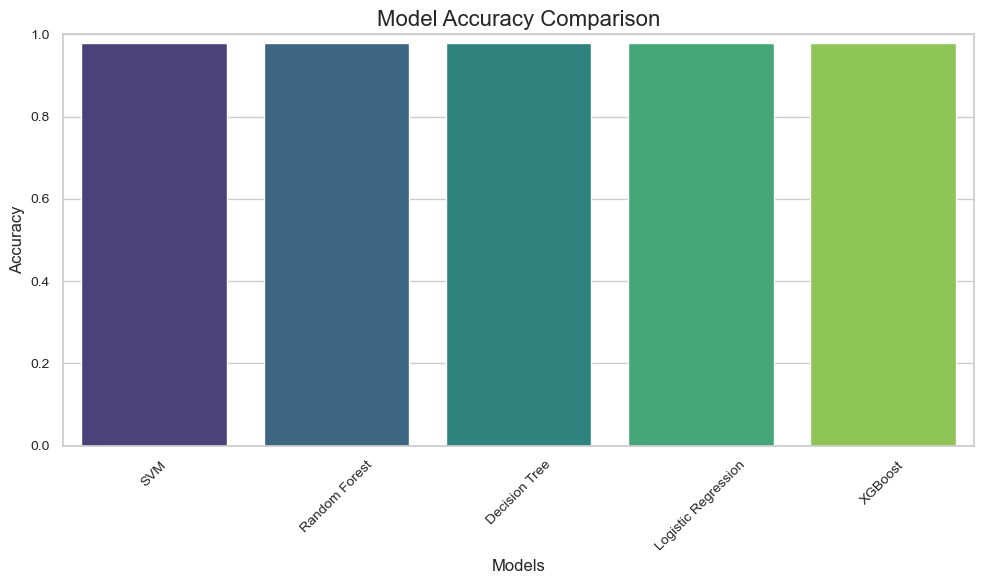

In [44]:
# Plot model accuracies

# Model names and their corresponding accuracies
models = ['SVM', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'XGBoost']
accuracies = [svm_accuracy, rf_accuracy, dt_accuracy, lr_accuracy, xgb_accuracy]

# Plotting
plt.figure(figsize=(10, 6))

# Set Seaborn style and color palette
sns.set_theme(style="whitegrid")
colors = sns.color_palette("viridis", len(models))

# Create a bar plot for model accuracy comparison
sns.barplot(x=models, y=accuracies, palette=colors, hue=models, dodge=False)

# Set limits and labels
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


Classification and Its Types
What is Classification?
Classification is a type of supervised learning in machine learning where the goal is to categorize data into predefined labels or classes. It works by training a model on labeled data so that it can predict the correct class for new, unseen data.

For example, in an email spam detection system, the model learns to classify emails as "Spam" or "Not Spam" based on previous labeled emails.

Types of Classification
1️⃣ Binary Classification
The simplest form of classification with only two possible classes.

Example: Spam vs. Not Spam, Disease Present vs. Not Present

Algorithms: Logistic Regression, SVM, Decision Tree, Random Forest, XGBoost

2️⃣ Multiclass Classification
Involves more than two classes, but each input belongs to only one class.

Example: Handwritten digit recognition (0-9), Animal species classification

Algorithms: Decision Tree, Random Forest, XGBoost, Neural Networks

3️⃣ Multilabel Classification
Each input can belong to multiple classes at the same time.

Example: A news article can be about both politics and sports.

Algorithms: k-Nearest Neighbors (k-NN), Neural Networks, Support Vector Machines (SVM)

4️⃣ Imbalanced Classification
When one class has significantly more instances than others.

Example: Fraud detection (99% transactions are genuine, 1% are fraud)

Techniques Used: Oversampling, Undersampling, SMOTE (Synthetic Minority Over-sampling Technique)

Common Classification Algorithms
🔹 Logistic Regression – Best for binary classification.
🔹 Decision Trees – Simple, interpretable, but prone to overfitting.
🔹 Random Forest – An ensemble of decision trees for better accuracy.
🔹 Support Vector Machine (SVM) – Works well for high-dimensional data.
🔹 Naive Bayes – Based on probability, used for text classification.
🔹 K-Nearest Neighbors (KNN) – Classifies based on nearest data points.
🔹 XGBoost & Gradient Boosting – Powerful for structured data problems.

Evaluation Metrics in Classification
📌 Accuracy – Measures overall correctness.
📌 Precision – Focuses on how many predicted positives are actually correct.
📌 Recall – Measures how well the model finds actual positives.
📌 F1-Score – A balance between Precision and Recall.
📌 Confusion Matrix – Shows TP, TN, FP, and FN for analysis.

Conclusion
Classification is a fundamental machine learning task used in various domains like spam filtering, medical diagnosis, fraud detection, and sentiment analysis. The choice of algorithm depends on the nature of the problem, dataset size, and required interpretability. 🚀